In [1]:
from article_loader_parser import article_loader_to_df
from sentiment_analysis_functions import *
from word_cleaning_functions import *
from topic_modeling_functions import *


OSError: [E050] Can't find model 'en_core_web_sm'. It doesn't seem to be a Python package or a valid path to a data directory.

In [3]:
global_path = 'C:/Users/17742/Desktop/win_art_writing/art_writing/'
path = 'nytimes'
#path = 'artnet_articles'
#path = 'artforum'

folder_path = global_path + path #os.path.expanduser(os.path.join(global_path, path))

data = article_loader_to_df(folder_path=folder_path, iterable=200, israndom=True)
#print(data)

Keyerrors: 71 	 Json import errors: 0  	  final import count: (200, 4)


ValueError: If mode is 'interp', window_length must be less than or equal to the size of x.

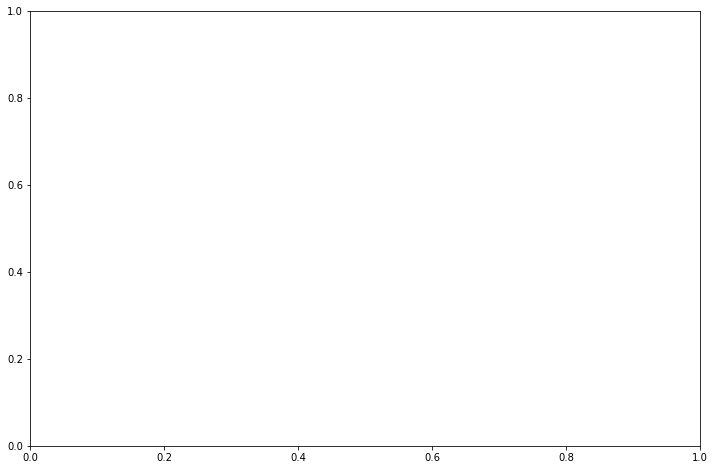

In [4]:
plot = timeplot_sentiment(data, "polarity", path)
